/usr/local/lib/python3.10/dist-packages/pymc/data.py:433: UserWarning: The `mutable` kwarg was not specified. Before v4.1.0 it defaulted to `pm.Data(mutable=True)`, which is equivalent to using `pm.MutableData()`. In v4.1.0 the default changed to `pm.Data(mutable=False)`, equivalent to `pm.ConstantData`. Use `pm.ConstantData`/`pm.MutableData` or pass `pm.Data(..., mutable=False/True)` to avoid this warning.
  warnings.warn(


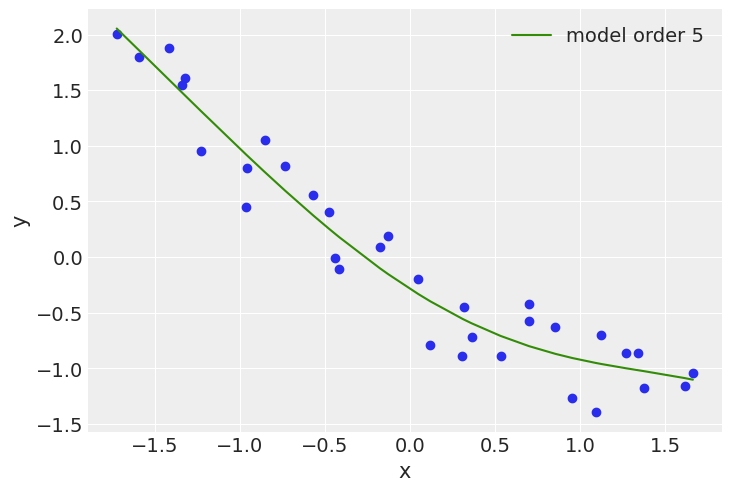

In [45]:
import pymc as pm
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import arviz as az
az.style.use('arviz-darkgrid')


dummy_data = np.loadtxt('./dummy.csv')
x_1 = dummy_data[:, 0]
y_1 = dummy_data[:, 1]
order = 5

x_1p = np.vstack([x_1**i for i in range(1, order+1)])
x_1s = (x_1p - x_1p.mean(axis=1, keepdims=True))/ x_1p.std(axis=1, keepdims=True)
y_1s = (y_1 - y_1.mean()) / y_1.std()

plt.scatter(x_1s[0], y_1s)
plt.xlabel('x')
plt.ylabel('y')

with pm.Model() as model_p:
    x_1s_shared = pm.Data("x1", x_1s)
    y_1s_shared = pm.Data("y1", y_1s)
    alpha = pm.Normal('α', mu=0, sigma=1)
    beta = pm.Normal('β', mu=0, sigma=10, shape=order)
    e = pm.HalfNormal('ε', 5)
    mu = alpha + pm.math.dot(beta, x_1s_shared)
    y_pred = pm.Normal('y_pred', mu=mu, sigma=e, observed=y_1s_shared)
    idata_p = pm.sample(750, return_inferencedata=True)


alpha_p_post = idata_p.posterior['α'].mean(("chain", "draw")).values
beta_p_post = idata_p.posterior['β'].mean(("chain", "draw")).values
idx = np.argsort(x_1s[0])
y_p_post = alpha_p_post + np.dot(beta_p_post, x_1s)

plt.plot(x_1s[0][idx], y_p_post[idx], 'C2', label=f'model order {order}')
plt.scatter(x_1s[0], y_1s, c='C0', marker='.')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/pymc/data.py:433: UserWarning: The `mutable` kwarg was not specified. Before v4.1.0 it defaulted to `pm.Data(mutable=True)`, which is equivalent to using `pm.MutableData()`. In v4.1.0 the default changed to `pm.Data(mutable=False)`, equivalent to `pm.ConstantData`. Use `pm.ConstantData`/`pm.MutableData` or pass `pm.Data(..., mutable=False/True)` to avoid this warning.
  warnings.warn(


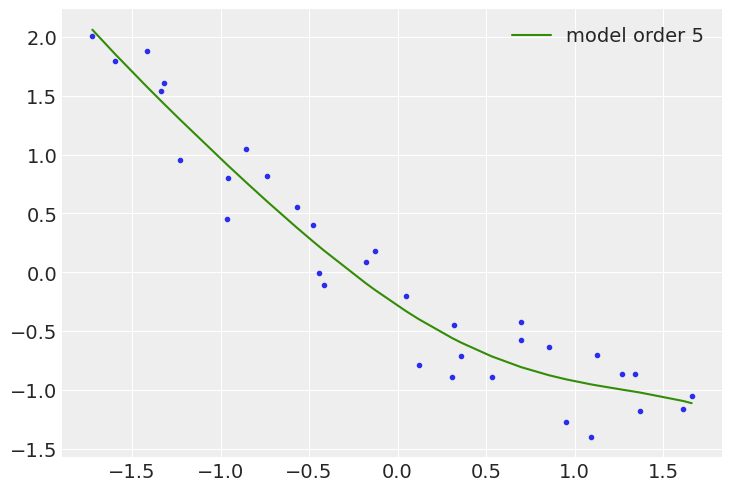

In [22]:

with pm.Model() as model_p_sd_100:
    x_1s_shared = pm.Data("x1", x_1s)
    y_1s_shared = pm.Data("y1", y_1s)
    alpha = pm.Normal('α', mu=0, sigma=1)
    beta = pm.Normal('β', mu=0, sigma=100, shape=order)
    e = pm.HalfNormal('ε', 5)
    mu = alpha + pm.math.dot(beta, x_1s_shared)
    y_pred = pm.Normal('y_pred', mu=mu, sigma=e, observed=y_1s_shared)
    idata_p_sd_100 = pm.sample(750, return_inferencedata=True)

alpha_p_post = idata_p.posterior['α'].mean(("chain", "draw")).values
beta_p_post = idata_p.posterior['β'].mean(("chain", "draw")).values
idx = np.argsort(x_1s[0])
y_p_post = alpha_p_post + np.dot(beta_p_post, x_1s)


plt.plot(x_1s[0][idx], y_p_post[idx], 'C2', label=f'model order {order}')
plt.scatter(x_1s[0], y_1s, c='C0', marker='.')
plt.legend()
plt.show()




/usr/local/lib/python3.10/dist-packages/pymc/data.py:433: UserWarning: The `mutable` kwarg was not specified. Before v4.1.0 it defaulted to `pm.Data(mutable=True)`, which is equivalent to using `pm.MutableData()`. In v4.1.0 the default changed to `pm.Data(mutable=False)`, equivalent to `pm.ConstantData`. Use `pm.ConstantData`/`pm.MutableData` or pass `pm.Data(..., mutable=False/True)` to avoid this warning.
  warnings.warn(


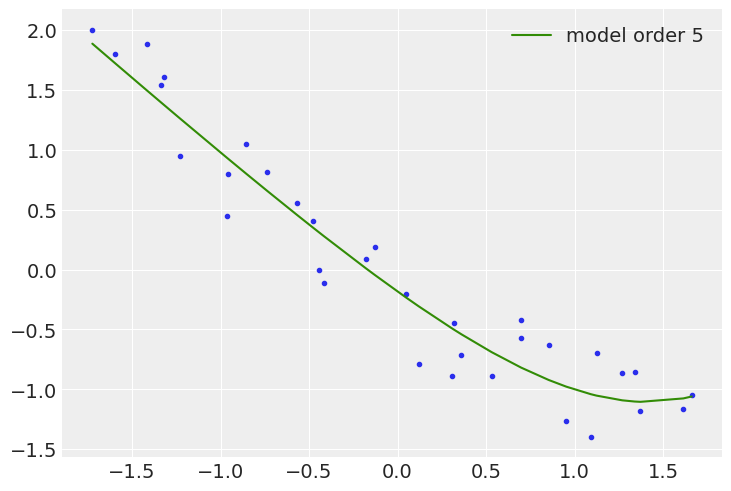

In [46]:
sd = np.array([10, 0.1, 0.1, 0.1, 0.1])
with pm.Model() as model_p_sd_array:
    x_1s_shared = pm.Data("x1", x_1s)
    y_1s_shared = pm.Data("y1", y_1s)
    alpha = pm.Normal('α', mu=0, sigma=1)
    beta = pm.Normal('β', mu=0, sigma=sd, shape=order)
    e = pm.HalfNormal('ε', 5)
    mu = alpha + pm.math.dot(beta, x_1s_shared)
    y_pred = pm.Normal('y_pred', mu=mu, sigma=e, observed=y_1s_shared)
    idata_p_sd_array = pm.sample(750, return_inferencedata=True)

alpha_p_post = idata_p_sd_array.posterior['α'].mean(("chain", "draw")).values
beta_p_post = idata_p_sd_array.posterior['β'].mean(("chain", "draw")).values
idx = np.argsort(x_1s[0])
y_p_post = alpha_p_post + np.dot(beta_p_post, x_1s)
plt.plot(x_1s[0][idx], y_p_post[idx], 'C2', label=f'model order {order}')
plt.scatter(x_1s[0], y_1s, c='C0', marker='.')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/pymc/data.py:433: UserWarning: The `mutable` kwarg was not specified. Before v4.1.0 it defaulted to `pm.Data(mutable=True)`, which is equivalent to using `pm.MutableData()`. In v4.1.0 the default changed to `pm.Data(mutable=False)`, equivalent to `pm.ConstantData`. Use `pm.ConstantData`/`pm.MutableData` or pass `pm.Data(..., mutable=False/True)` to avoid this warning.
  warnings.warn(


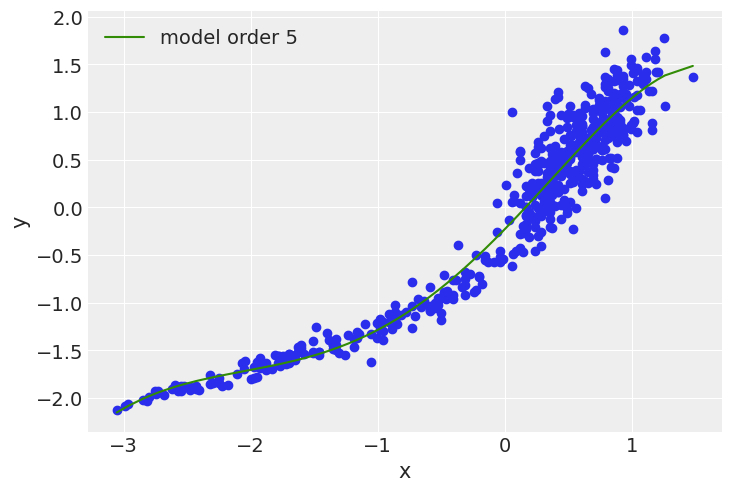

In [41]:
import pandas as pd

data = pd.read_csv("./howell.csv", sep=";")
x_1 = data.iloc[:, 0]
y_1 = data.iloc[:, 1]

order = 5

x_1p = np.vstack([x_1**i for i in range(1, order+1)])
x_1s = (x_1p - x_1p.mean(axis=1, keepdims=True))/ x_1p.std(axis=1, keepdims=True)
y_1s = (y_1 - y_1.mean()) / y_1.std()

plt.scatter(x_1s[0], y_1s)
plt.xlabel('x')
plt.ylabel('y')
with pm.Model() as model_p:
    x_1s_shared = pm.Data("x1", x_1s)
    y_1s_shared = pm.Data("y1", y_1s)
    alpha = pm.Normal('α', mu=0, sigma=1)
    beta = pm.Normal('β', mu=0, sigma=10, shape=order)
    e = pm.HalfNormal('ε', 5)
    mu = alpha + pm.math.dot(beta, x_1s_shared)
    y_pred = pm.Normal('y_pred', mu=mu, sigma=e, observed=y_1s_shared)
    idata_p = pm.sample(750, return_inferencedata=True)


alpha_p_post = idata_p.posterior['α'].mean(("chain", "draw")).values
beta_p_post = idata_p.posterior['β'].mean(("chain", "draw")).values
idx = np.argsort(x_1s[0])
y_p_post = alpha_p_post + np.dot(beta_p_post, x_1s)

plt.plot(x_1s[0][idx], y_p_post[idx], 'C2', label=f'model order {order}')
plt.scatter(x_1s[0], y_1s, c='C0', marker='.')
plt.legend()
plt.show()



/usr/local/lib/python3.10/dist-packages/pymc/data.py:433: UserWarning: The `mutable` kwarg was not specified. Before v4.1.0 it defaulted to `pm.Data(mutable=True)`, which is equivalent to using `pm.MutableData()`. In v4.1.0 the default changed to `pm.Data(mutable=False)`, equivalent to `pm.ConstantData`. Use `pm.ConstantData`/`pm.MutableData` or pass `pm.Data(..., mutable=False/True)` to avoid this warning.
  warnings.warn(


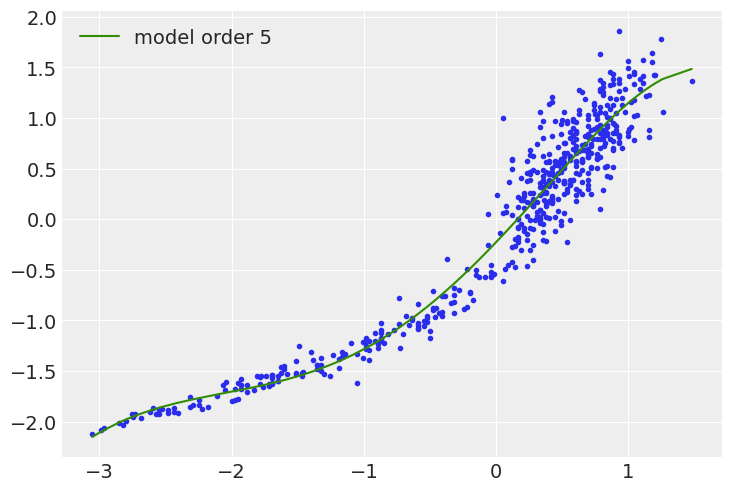

In [43]:
with pm.Model() as model_p_sd_100:
    x_1s_shared = pm.Data("x1", x_1s)
    y_1s_shared = pm.Data("y1", y_1s)
    alpha = pm.Normal('α', mu=0, sigma=1)
    beta = pm.Normal('β', mu=0, sigma=100, shape=order)
    e = pm.HalfNormal('ε', 5)
    mu = alpha + pm.math.dot(beta, x_1s_shared)
    y_pred = pm.Normal('y_pred', mu=mu, sigma=e, observed=y_1s_shared)
    idata_p_sd_100 = pm.sample(750, return_inferencedata=True)

alpha_p_post = idata_p.posterior['α'].mean(("chain", "draw")).values
beta_p_post = idata_p.posterior['β'].mean(("chain", "draw")).values
idx = np.argsort(x_1s[0])
y_p_post = alpha_p_post + np.dot(beta_p_post, x_1s)


plt.plot(x_1s[0][idx], y_p_post[idx], 'C2', label=f'model order {order}')
plt.scatter(x_1s[0], y_1s, c='C0', marker='.')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/pymc/data.py:433: UserWarning: The `mutable` kwarg was not specified. Before v4.1.0 it defaulted to `pm.Data(mutable=True)`, which is equivalent to using `pm.MutableData()`. In v4.1.0 the default changed to `pm.Data(mutable=False)`, equivalent to `pm.ConstantData`. Use `pm.ConstantData`/`pm.MutableData` or pass `pm.Data(..., mutable=False/True)` to avoid this warning.
  warnings.warn(


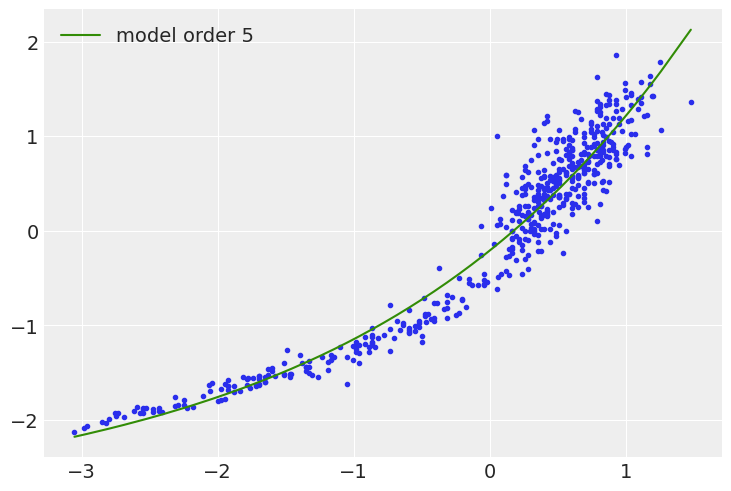

In [44]:
sd = np.array([10, 0.1, 0.1, 0.1, 0.1])
with pm.Model() as model_p_sd_array:
    x_1s_shared = pm.Data("x1", x_1s)
    y_1s_shared = pm.Data("y1", y_1s)
    alpha = pm.Normal('α', mu=0, sigma=1)
    beta = pm.Normal('β', mu=0, sigma=sd, shape=order)
    e = pm.HalfNormal('ε', 5)
    mu = alpha + pm.math.dot(beta, x_1s_shared)
    y_pred = pm.Normal('y_pred', mu=mu, sigma=e, observed=y_1s_shared)
    idata_p_sd_array = pm.sample(750, return_inferencedata=True)

alpha_p_post = idata_p_sd_array.posterior['α'].mean(("chain", "draw")).values
beta_p_post = idata_p_sd_array.posterior['β'].mean(("chain", "draw")).values
idx = np.argsort(x_1s[0])
y_p_post = alpha_p_post + np.dot(beta_p_post, x_1s)
plt.plot(x_1s[0][idx], y_p_post[idx], 'C2', label=f'model order {order}')
plt.scatter(x_1s[0], y_1s, c='C0', marker='.')
plt.legend()
plt.show()